<a href="https://colab.research.google.com/github/RichardCanchon29/BIT_IA_Bootcamp/blob/main/S2_C2_RDG_MARKETING_TARGET_INCOME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd  # Para el manejo de los datos
import numpy as np # Para el manejo de operaciones entre datos, y las columnas
import matplotlib.pyplot as plt # Para el manejo de las graficas
import seaborn as sns # Para el manejo de graficas

iMPORTAR DATOS

In [48]:
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import os    # la librería necesaria para la ruta de la carpeta
os.chdir('/content/drive/MyDrive/Bootcamp_en_Inteligencias_Artificial/Colab Notebooks/Datasent limpio')
#mostar lista de archivos
os.listdir()

['marketing_extract_2X_Income.xlsx']

In [50]:
df = pd.read_excel('marketing_extract_2X_Income.xlsx')

# EXPLORAR DATOS

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MntMeatProducts  2216 non-null   int64
 1   MntWines         2216 non-null   int64
 2   Income           2216 non-null   int64
dtypes: int64(3)
memory usage: 52.1 KB


# **Comparativo**

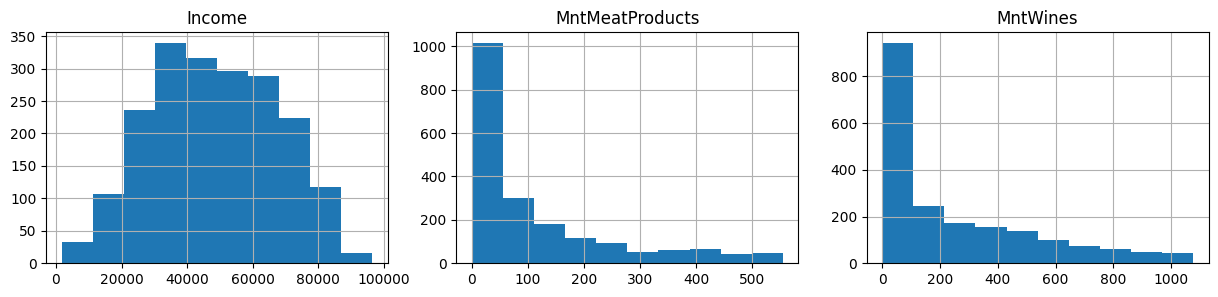

In [61]:
df = df[df['Income'] < 100000]
plt.figure(figsize=(15,3))
plt.subplot(1, 3, 1)
df['Income'].hist()
plt.title('Income')

df = df[df['MntMeatProducts'] < 20000]
plt.subplot(1, 3, 2)
df['MntMeatProducts'].hist()
plt.title('MntMeatProducts')

df = df[df['MntWines'] < 20000]
plt.subplot(1, 3, 3)
df['MntWines'].hist()
plt.title('MntWines')

plt.show()

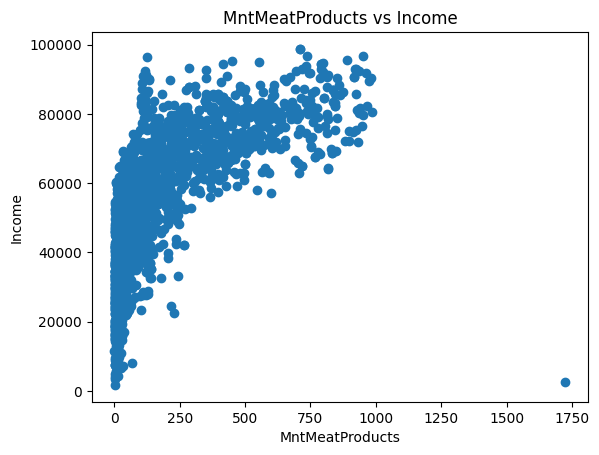

In [53]:
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.show()

In [54]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['Income'] < (Q1-1.5*IQR))|(df['Income'] > (Q3+1.5*IQR)))]

In [55]:
Q1 = df['MntMeatProducts'].quantile(0.25)
Q3 = df['MntMeatProducts'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['MntMeatProducts'] < (Q1-1.5*IQR))|(df['MntMeatProducts'] > (Q3+1.5*IQR)))]

In [56]:
Q1 = df['MntWines'].quantile(0.25)
Q3 = df['MntWines'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['MntWines'] < (Q1-1.5*IQR))|(df['MntWines'] > (Q3+1.5*IQR)))]

# Grafica MntWines : INCOME

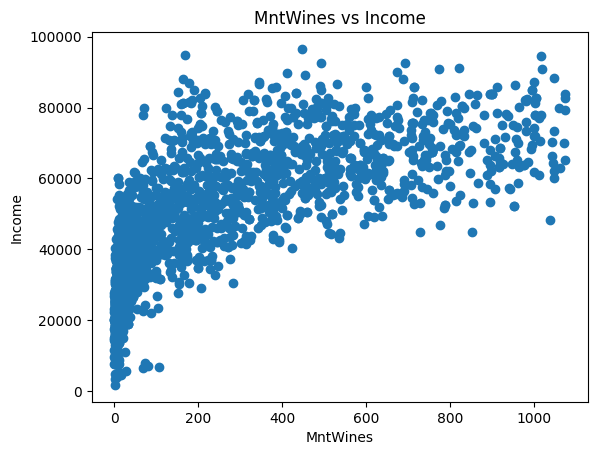

In [57]:
df = df[df['Income'] < 100000]

plt.scatter(df['MntWines'],df['Income'])
plt.title('MntWines vs Income')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.show()

# Grafica MntMeatProductss VS Income

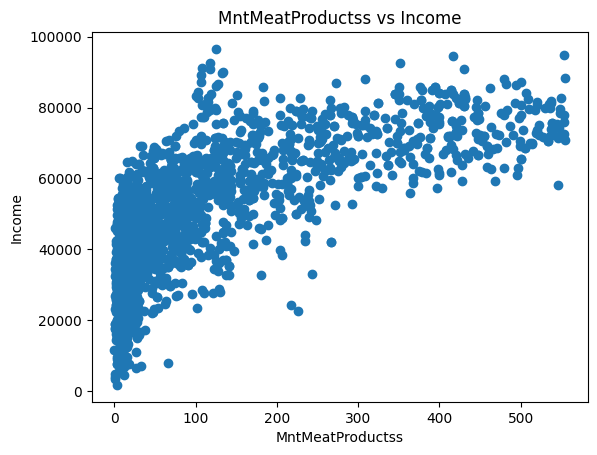

In [58]:
df = df[df['Income'] < 100000]

plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('MntMeatProductss vs Income')
plt.xlabel('MntMeatProductss')
plt.ylabel('Income')
plt.show()

<Axes: title={'center': 'MntMeatProducts'}, xlabel='Income'>

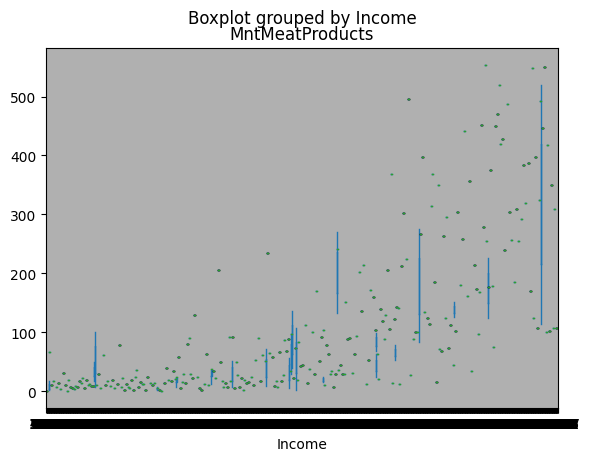

In [59]:
df.boxplot(column="MntMeatProducts", by="Income")

# Comparativo de **MntWines vs Income y MntMeatProductss VS Income**

Text(0, 0.5, 'Income')

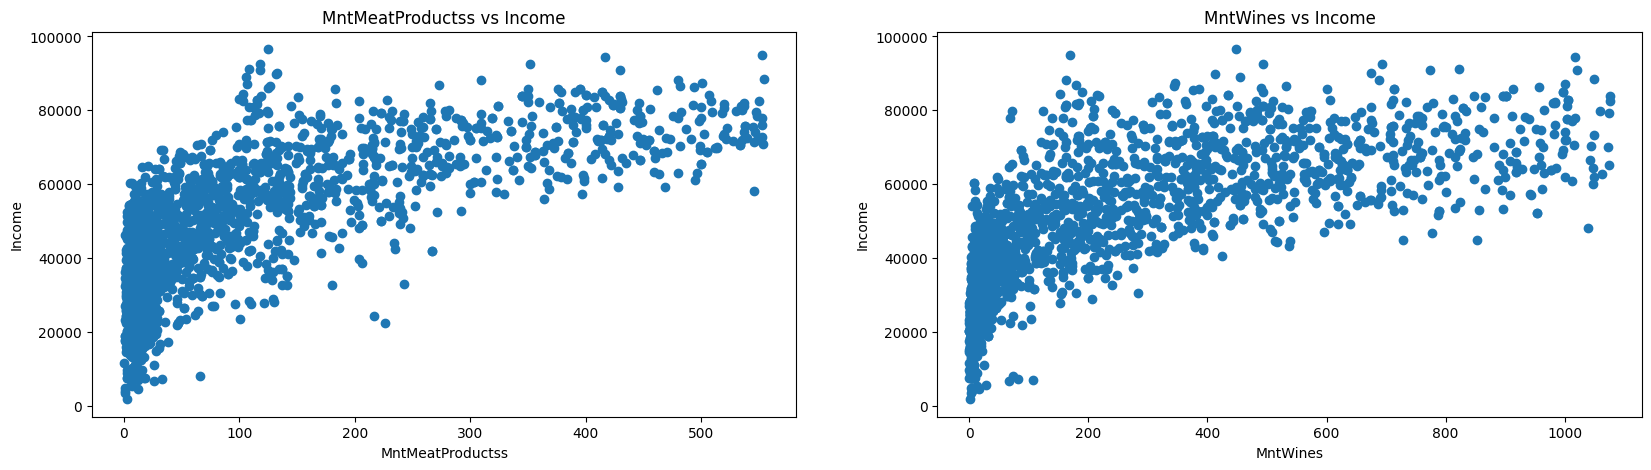

In [60]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('MntMeatProductss vs Income')
plt.xlabel('MntMeatProductss')
plt.ylabel('Income')

plt.subplot(1, 2, 2)
plt.scatter(df['MntWines'],df['Income'])
plt.title('MntWines vs Income')
plt.xlabel('MntWines')
plt.ylabel('Income')

**2. Inicializacion de Parametros**

In [65]:
theta = 80
intercept = 5000

**3. Predicción**

In [71]:
# Y = b +nX
# h = b + Theta(X1)
df['Hipotesis'] = intercept + theta * df['MntMeatProducts']

In [72]:
df.head(6)

,MntMeatProducts,MntWines,Income,Hipotesis
0,546,635,58138,48680
1,6,11,46344,5480
2,127,426,71613,15160
3,20,11,26646,6600
4,118,173,58293,14440
5,98,520,62513,12840


Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

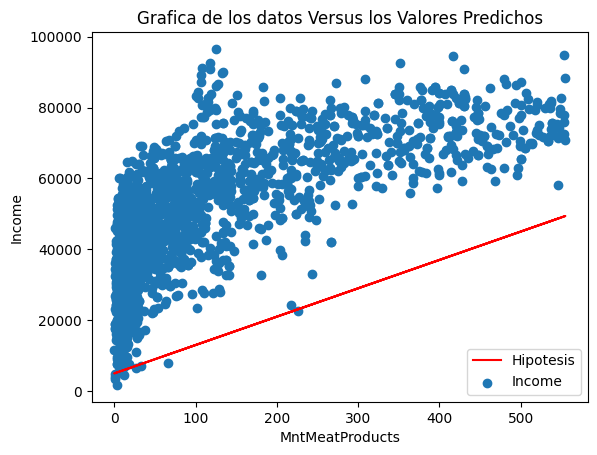

In [78]:
plt.plot(df['MntMeatProducts'],df['Hipotesis'],color='red')
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.legend(['Hipotesis','Income'])
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.title('Grafica de los datos Versus los Valores Predichos')


In [79]:
# Y = b +nX
# h = b + Theta(X1)
df['Hipotesis'] = intercept + theta * df['MntWines']

Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

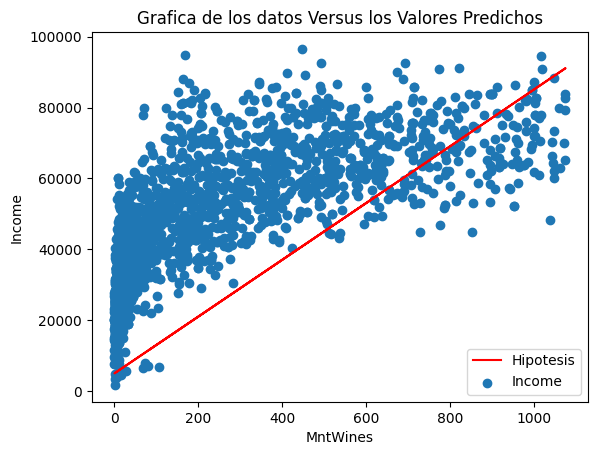

In [80]:
plt.plot(df['MntWines'],df['Hipotesis'],color='red')
plt.scatter(df['MntWines'],df['Income'])
plt.legend(['Hipotesis','Income'])
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.title('Grafica de los datos Versus los Valores Predichos')

Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

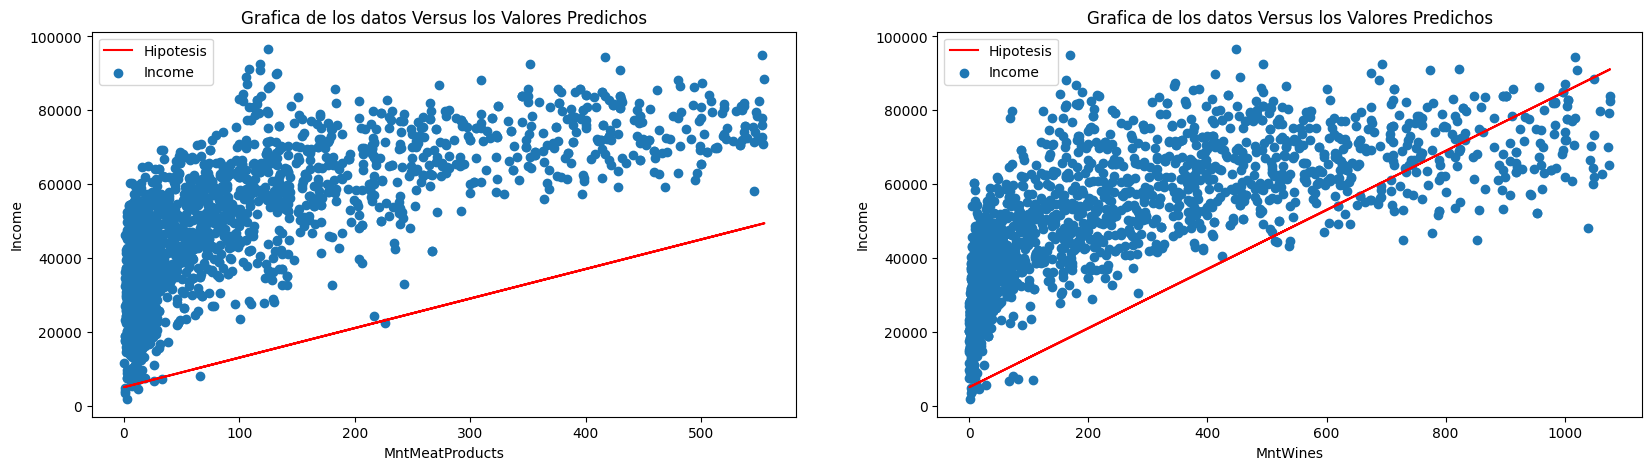

In [86]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
df['Hipotesis'] = intercept + theta * df['MntMeatProducts']
plt.plot(df['MntMeatProducts'],df['Hipotesis'],color='red')
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.legend(['Hipotesis','Income'])
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.title('Grafica de los datos Versus los Valores Predichos')

plt.subplot(1, 2, 2)
df['Hipotesis'] = intercept + theta * df['MntWines']
plt.plot(df['MntWines'],df['Hipotesis'],color='red')
plt.scatter(df['MntWines'],df['Income'])
plt.legend(['Hipotesis','Income'])
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.title('Grafica de los datos Versus los Valores Predichos')